In [7]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import pycountry


ufc_raw = pd.read_csv("data.csv")
ufc_final = pd.read_csv("UFC_FINAL.csv")
df_blue = pd.read_csv("df_blue.csv")

### Choropleth Map: UFC Worldwide

In [9]:
#Choropleth Map:

# extract country from location
ufc_raw["country"] = ufc_raw["location"].apply(lambda loc: loc.split(',')[-1][1:])

# convert country to alpha3 code
country_codes = []
for country in ufc_raw["country"]: 
    if (country == 'Russia' or country ==  'russia'):
        country = "Russian Federation"
    if (country == 'South Korea'):
        country = "KR"        
    country_codes.append(pycountry.countries.lookup(country).alpha_3)

# value counts dataframe
ufc_worldwide = pd.DataFrame(np.array(country_codes))
ufc_worldwide = ufc_worldwide.iloc[:,0].value_counts().reset_index().rename(columns={"index":"country_code",0:"matches"})
ufc_worldwide.head()

,country_code,matches
0,USA,3392
1,BRA,405
2,CAN,342
3,GBR,255
4,AUS,162


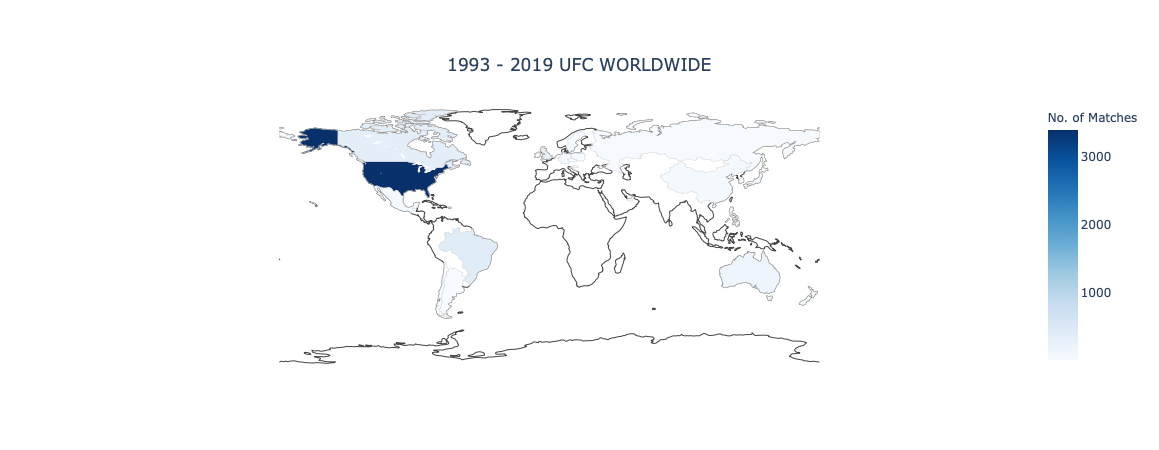

In [10]:
fig1 = go.Figure(
  data = go.Choropleth(
    locations = ufc_worldwide['country_code'], #alpha3 codes
    z = ufc_worldwide['matches'],
    text = "Matches",
    colorscale = 'Blues',
    autocolorscale = False,
    marker_line_color = 'lightgrey',
    marker_line_width = 0.5,
    colorbar_title = 'No. of Matches'
  )
)

fig1.update_layout(
  title = {
    'text': "1993 - 2019 UFC WORLDWIDE",
    'x': 0.5,
    'y': 0.87,
  },
  geo = dict(
    showframe = False,
    showcoastlines = True,
    projection_type = 'equirectangular',
    showland = False,
    showlakes = True,

  )

)

fig1.show()
